# Import libs

In [1]:
import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.kmeans.kmeans import kmeans
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from models.bayes_classifier.bayes_classifier import bayes_classifier
from models.bayes_linear_classifier.bayes_linear_classifier import bayes_linear_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean, min_max_normalization
from matplotlib import pyplot as plt

# Loading normalized Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')

X = min_max_normalization(Xy.drop(['class'], axis=1))
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []
b_majority_class_hit_rate_list = []
b_mean_class_hit_rate_list = []
lb_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0
b_majority_class_std_dev = 0
b_mean_class_std_dev = 0
lb_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []
b_majority_class_confusion_matrix_list = []
b_mean_class_confusion_matrix_list = []
lb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
    b_majority_class_model.fit(X_train, y_train)

    b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
    b_mean_class_model.fit(X_train, y_train)

    lb_model = bayes_linear_classifier()
    lb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))
    b_majority_class_hit_rate_list.append(b_majority_class_model.score(X_test, y_test))
    b_mean_class_hit_rate_list.append(b_mean_class_model.score(X_test, y_test))
    lb_hit_rate_list.append(lb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]
    b_majority_class_y_pred = [b_majority_class_model.predict(x) for x in X_test.values]
    b_mean_class_y_pred = [b_mean_class_model.predict(x) for x in X_test.values]
    lb_y_pred = [lb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))
    b_majority_class_confusion_matrix_list.append(confusion_matrix(y_test, b_majority_class_y_pred))
    b_mean_class_confusion_matrix_list.append(confusion_matrix(y_test, b_mean_class_y_pred))
    lb_confusion_matrix_list.append(confusion_matrix(y_test, lb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)
b_majority_class_std_dev = np.std(b_majority_class_hit_rate_list)
b_mean_class_std_dev = np.std(b_mean_class_hit_rate_list)
lb_std_dev = np.std(lb_hit_rate_list)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'floa

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[1.0, 0.9666666666666667, 0.9, 1.0, 1.0, 0.8666666666666667, 0.9, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667]

Accuracy:
0.9566666666666667

Standard Deviation:
0.040960685758148346

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0           11                0
Iris-versicolor               0            0                9
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               13                0               0
Iris-versicolor            0                8               1
Iris-virginica             0                0               8
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                6            

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,0
Iris-setosa,0,10,0
Iris-versicolor,0,0,9


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[1.0, 0.9, 0.9333333333333333, 0.9333333333333333, 1.0, 0.8333333333333334, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9, 0.8666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9]

Accuracy:
0.9416666666666667

Standard Deviation:
0.04579543888011361

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0           11                0
Iris-versicolor               0            0                9
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               13                0               0
Iris-versicolor            0                7               2
Iris-virginica             0                1               7
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,8,0,0
Iris-setosa,0,10,0
Iris-versicolor,0,0,9


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9, 0.8666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9, 1.0, 0.9333333333333333, 1.0, 0.9666666666666667, 1.0, 1.0]

Accuracy:
0.9533333333333334

Standard Deviation:
0.039999999999999994

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0           11                0
Iris-versicolor               1            0                8
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               13                0               0
Iris-versicolor            0                7               2
Iris-virginica             0                0               8
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor           

In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,0
Iris-setosa,0,10,0
Iris-versicolor,0,0,9


# Showing naive bayes informations computed

In [10]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 1.0, 0.8333333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.8666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333]

Accuracy:
0.9550000000000001

Standard Deviation:
0.043811464760316374

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0           11                0
Iris-versicolor               0            0                9
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               13                0               0
Iris-versicolor            0                7               2
Iris-virginica             0                0               8
                 Iris-versicolor  Iris

In [11]:
confusion_matrix_mean(nb_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,0
Iris-setosa,0,10,0
Iris-versicolor,0,0,9


# Showing bayes informations computed

In [12]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0]

Accuracy:
0.9783333333333333

Standard Deviation:
0.02420973174388991

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0           11                0
Iris-versicolor               0            0                9
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               13                0               0
Iris-versicolor            0                8               1
Iris-virginica             0                0               8
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                7           

In [13]:
confusion_matrix_mean(b_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,0
Iris-setosa,0,10,0
Iris-versicolor,0,0,9


# Showing Bayes Majority Class Informations computed

In [14]:
print('----------------- BAYES M C model -----------------')
print('Hit rate:')
print(b_majority_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_majority_class_hit_rate_list)/len(b_majority_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_majority_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_majority_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES M C model -----------------
Hit rate:
[0.9333333333333333, 0.9666666666666667, 0.9, 1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0]

Accuracy:
0.97

Standard Deviation:
0.04068851871911233

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica                9            0                1
Iris-setosa                   0           11                0
Iris-versicolor               1            0                8
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               13                0               0
Iris-versicolor            0                8               1
Iris-virginica             0                0               8
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                7               1            0
Iris-virginica                 2    

In [15]:
confusion_matrix_mean(b_majority_class_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,0
Iris-setosa,0,10,0
Iris-versicolor,0,0,9


# Showing Bayes Mean Class informations computed

In [16]:
print('----------------- BAYES MEAN C model -----------------')
print('Hit rate:')
print(b_mean_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_mean_class_hit_rate_list)/len(b_mean_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_mean_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_mean_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES MEAN C model -----------------
Hit rate:
[1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0]

Accuracy:
0.9866666666666666

Standard Deviation:
0.019436506316150997

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0           11                0
Iris-versicolor               0            0                9
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               13                0               0
Iris-versicolor            0                8               1
Iris-virginica             0                0               8
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                7               1            0
Iris-virginica    

In [17]:
confusion_matrix_mean(b_mean_class_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,0
Iris-setosa,0,10,0
Iris-versicolor,0,0,9


# Showing Linear Bayes informations computed

In [18]:
print('----------------- LINEAR BAYES model -----------------')
print('Hit rate:')
print(lb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(lb_hit_rate_list)/len(lb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(lb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in lb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- LINEAR BAYES model -----------------
Hit rate:
[0.9333333333333333, 0.8, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.7666666666666667, 0.8, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9333333333333333, 0.8333333333333334, 0.8666666666666667, 0.7666666666666667, 0.9666666666666667, 0.8, 0.8333333333333334, 0.8666666666666667, 0.9666666666666667, 0.8666666666666667]

Accuracy:
0.8683333333333335

Standard Deviation:
0.06098724821177328

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica                9            0                1
Iris-setosa                   0           11                0
Iris-versicolor               1            0                8
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               12                1               0
Iris-versicolor            0                6               3
Iris-virginica             0                2               6
        

In [19]:
confusion_matrix_mean(lb_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,7,0,2
Iris-setosa,0,9,0
Iris-versicolor,1,0,8


# Choosing two columns from the last X_train and X_test to plot decision surface

In [21]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
124      0.666667     0.541667
123      0.555556     0.291667
59       0.250000     0.291667
139      0.722222     0.458333
104      0.611111     0.416667
..            ...          ...
105      0.916667     0.416667
49       0.194444     0.541667
13       0.000000     0.416667
68       0.527778     0.083333
53       0.333333     0.125000

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
80       0.333333     0.166667
16       0.305556     0.791667
144      0.666667     0.541667
39       0.222222     0.583333
62       0.472222     0.083333
112      0.694444     0.416667
89       0.333333     0.208333
69       0.361111     0.208333
119      0.472222     0.083333
136      0.555556     0.583333
90       0.333333     0.250000
137      0.583333     0.458333
64       0.361111     0.375000
30       0.138889     0.458333
3        0.083333     0.458333
94       0.361111     0.291667
81       0.333333     0.166667
2        0.111111

# Training the models with the new dataset 2d

In [22]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)
b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
b_majority_class_model.fit(X_train_2d, y_train)
b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
b_mean_class_model.fit(X_train_2d, y_train)
lb_model = bayes_linear_classifier()
lb_model.fit(X_train_2d, y_train)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

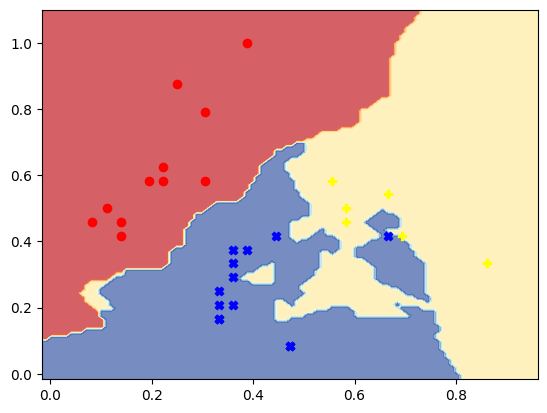

In [23]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(knn_y_pred == 'Iris-setosa')
virginica = np.where(knn_y_pred == 'Iris-virginica')
versicolor = np.where(knn_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting dmc decision surface

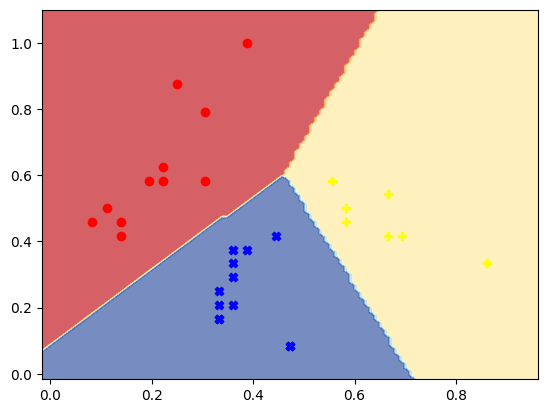

In [24]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(dmc_y_pred == 'Iris-setosa')
virginica = np.where(dmc_y_pred == 'Iris-virginica')
versicolor = np.where(dmc_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting kmeans decision surface

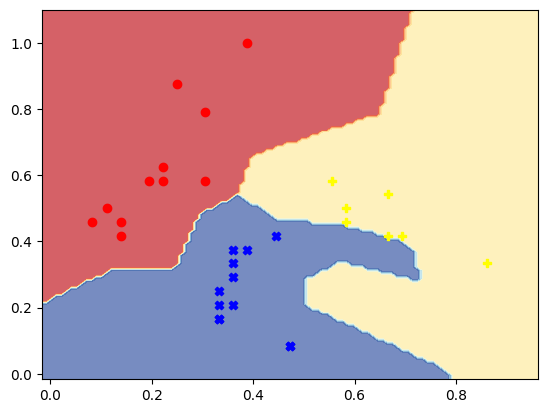

In [25]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

setosa = np.where(kmeans_y_pred == 'Iris-setosa')
virginica = np.where(kmeans_y_pred == 'Iris-virginica')
versicolor = np.where(kmeans_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting naive bayes decision surface

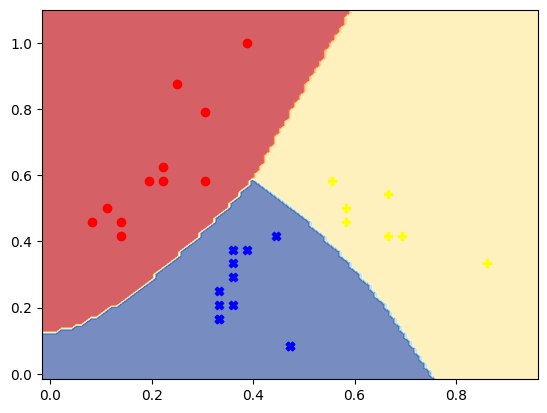

In [26]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

setosa = np.where(nb_y_pred == 'Iris-setosa')
virginica = np.where(nb_y_pred == 'Iris-virginica')
versicolor = np.where(nb_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting bayes decision surface

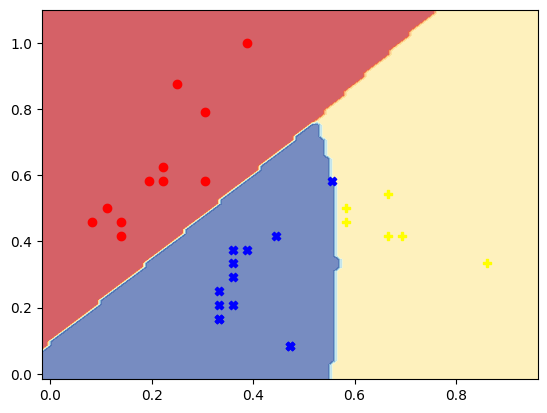

In [28]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

setosa = np.where(b_y_pred == 'Iris-setosa')
virginica = np.where(b_y_pred == 'Iris-virginica')
versicolor = np.where(b_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting bayes majority class decision surface

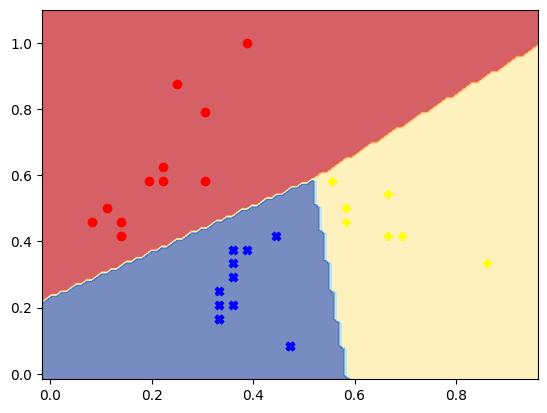

In [29]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_majority_class_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_majority_class_y_pred = np.array([b_majority_class_model.predict(x) for x in X_test_2d.values])

setosa = np.where(b_majority_class_y_pred == 'Iris-setosa')
virginica = np.where(b_majority_class_y_pred == 'Iris-virginica')
versicolor = np.where(b_majority_class_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting bayes mean class decision surface

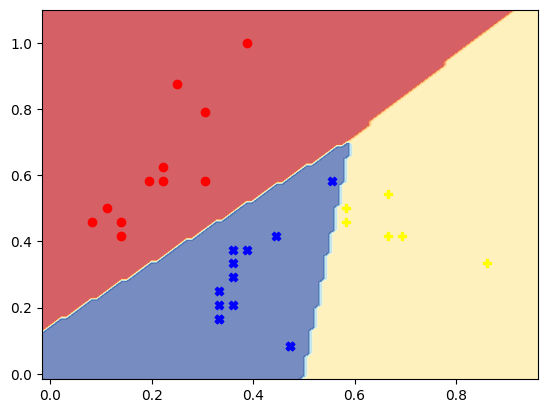

In [30]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_mean_class_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_mean_class_y_pred = np.array([b_mean_class_model.predict(x) for x in X_test_2d.values])

setosa = np.where(b_mean_class_y_pred == 'Iris-setosa')
virginica = np.where(b_mean_class_y_pred == 'Iris-virginica')
versicolor = np.where(b_mean_class_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting linear bayes decision surface

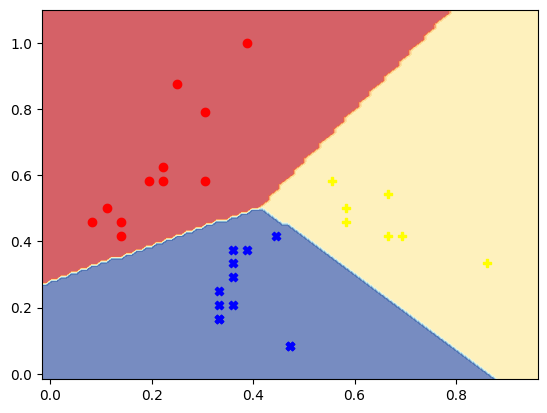

In [31]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[lb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

lb_y_pred = np.array([lb_model.predict(x) for x in X_test_2d.values])

setosa = np.where(lb_y_pred == 'Iris-setosa')
virginica = np.where(lb_y_pred == 'Iris-virginica')
versicolor = np.where(lb_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()